# Predict that someone will pay their loan or not based on the Historic Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\corona\DATA\lending_club_info.csv",index_col='LoanStatNew')   # index_col : use to give col name
data.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [3]:
print(data.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the actual Dataset

In [6]:
df = pd.read_csv('D:\corona\DATA\lending_club_loan_two.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

## Section 1 : Exploratory Data Analysis
#### OVERALL GOAL : Get a understanding for which variable are more important, view summary stats & visualize the data 

## -------------------------------------------------------------------------------------------------------------------------

#### TASK : Since we will be attempting to predict loan_status, create a countplot 

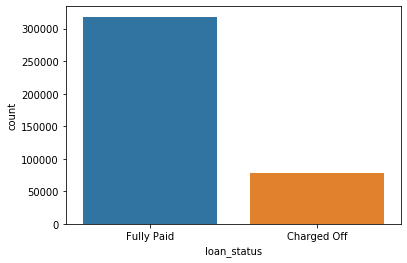

In [8]:
sns.countplot(x='loan_status',data=df)

#### TASK : Create Histogram of the load_amnt column

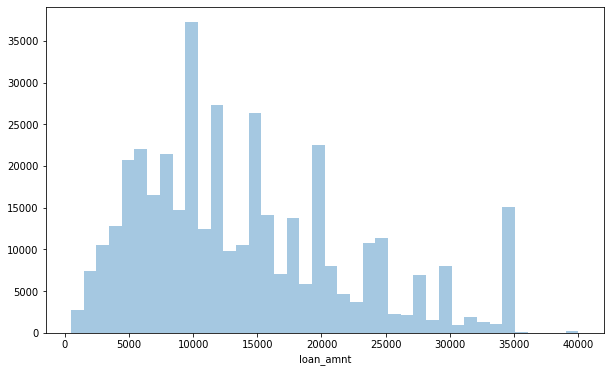

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
# the spikes indicates that they are standard loan eg : 10000,15000,20000,35000

#### TASK : Let's explore correlation between the continuous feature variable. Calculate the correlation between all continuous numberic variable

In [10]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


#### TASK : Visualize this using a heatmap.

(10, 0)

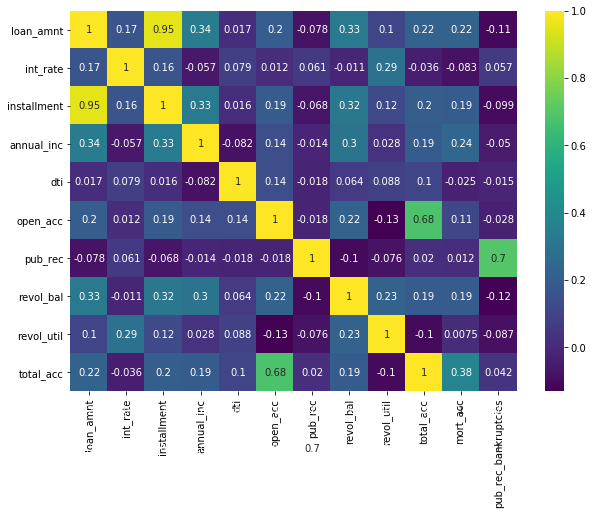

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10,0)        # values get cutoff that's why it is used

#### TASK : Notice loan_amt has almost perfect correlation with the "installment" feaute.
#### EXPLORE:
##### (i)   Print out descriptions
##### (ii)  Perform scatterplot between them
##### (iii) Does this relationship make sense?
##### (iv)  Do you think there is duplicate info here?

In [12]:
# (i.i) Info
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [13]:
# (i.ii) Info
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


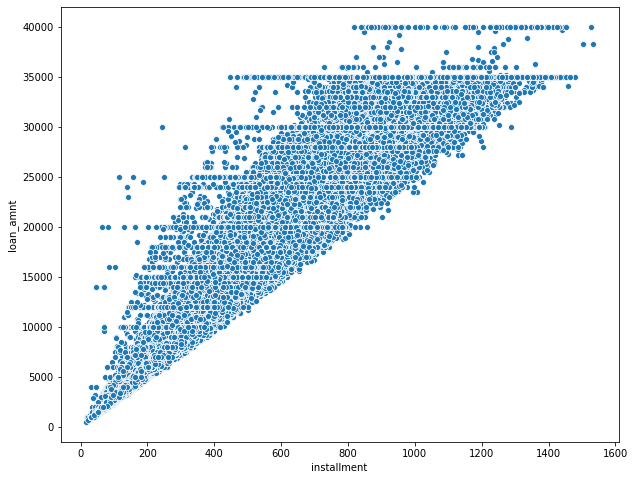

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='installment',y='loan_amnt',data=df)

#### TASK : Create a boxplot showing the relationship between the loan_status & the loan_amnt

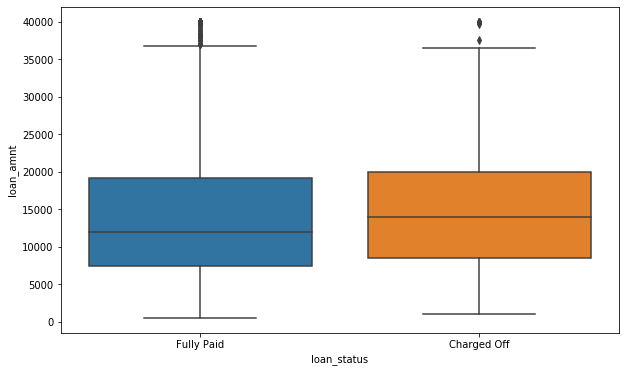

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

# It's harder to pay larger loans & it easy to pay the less amt of loan

#### TASK : Calculate the summary statistics for the loan_amnt, grouped by the loan_status 

In [16]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### TASK : Let's explore the Grade & Sub-Grade columns that lendingclub attribute to loans .
####        What are the unique possible grades & subgrades?

In [17]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [18]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [19]:
feat_info('sub_grade')

LC assigned loan subgrade


#### TASK : Create a countplot per grade. Set the hue to the loan_status label.

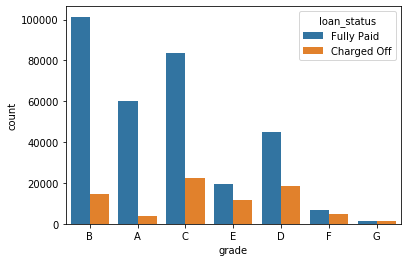

In [20]:
sns.countplot(x='grade',data=df,hue='loan_status')

#### TASK : Display count plot per subgrade. Resize & Reorder the x-axis.

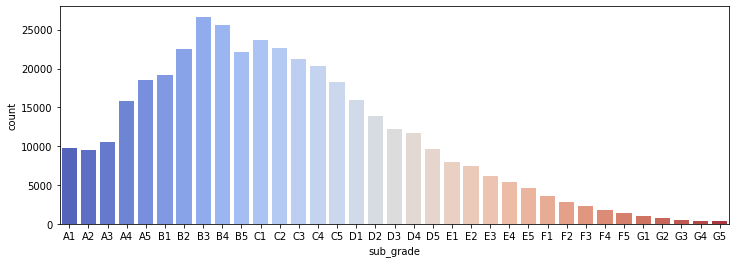

In [21]:
plt.figure(figsize=(12,4))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=sub_grade_order,palette='coolwarm')

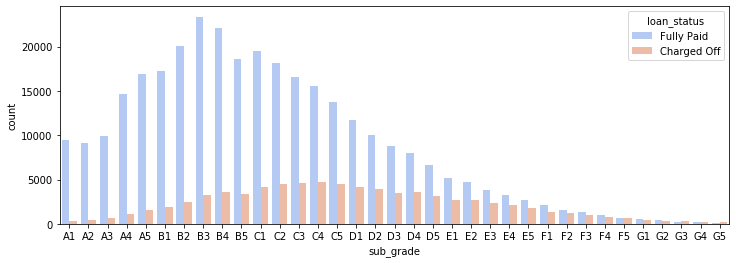

In [22]:
plt.figure(figsize=(12,4))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=sub_grade_order,palette='coolwarm',hue='loan_status')

#### TASK : It looks like F & G subgrades don't get paid back often. Isolate those & recreate the countplot just for those subgrades

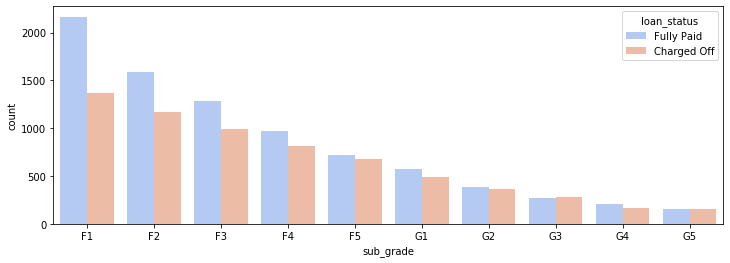

In [23]:
f_and_g = df[(df['grade']=='G') |  (df['grade']=='F')]
plt.figure(figsize=(12,4))
sub_grade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=sub_grade_order,palette='coolwarm',hue='loan_status')

#### TASK : Create a new Col called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" & 0 if it was 'Charged off'

In [24]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [25]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


#### TASK : Which numeric feature has highest co-relation with the actual label

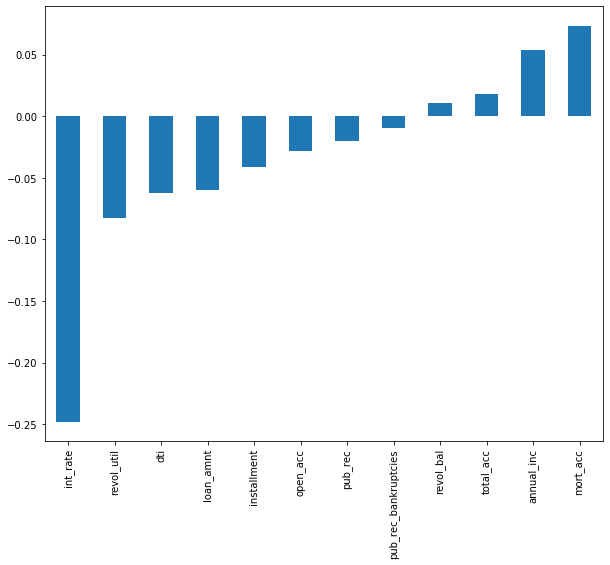

In [26]:
plt.figure(figsize=(10,8))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Section 2 : Data Preprocessing : Missing Data
#### SECTION 2 GOAL : Remove or Fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variable.

## -------------------------------------------------------------------------------------------------------------------------

#### TASK : Handel Missing Data

In [27]:
# Length of the DataFrame
len(df)

396030

#### TASK : Create a series that display the total count of missing values per column

In [28]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### TASK : Convert that series to be in term of % of the DataFrame

In [29]:
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

#### TASK : Let's examine emp_title & emp_length to see whether it will be okay to drop them. Print out their feature info using the feat_info() function from the top of this notebook

In [30]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [31]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


#### TASK : How many unique job title are there?

In [32]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [33]:
df['emp_title'].nunique()        # nunique : number of unique values

173105

In [34]:
df['emp_title'].value_counts()

Teacher                                    4389
Manager                                    4250
Registered Nurse                           1856
RN                                         1846
Supervisor                                 1830
                                           ... 
VCE-Cumberland/Virginia Tech                  1
US Dept of Housing & Urban Development        1
Prime Design                                  1
GLAZIERS FOOD MARKETPLACE                     1
Manager/Senior Consultant                     1
Name: emp_title, Length: 173105, dtype: int64

#### TASK : Realistically there are too many unique job title to try to convert this to a dummy variable. Let's remove that emp_title column

In [35]:
df=df.drop('emp_title',axis=1)

#### TASK : Create a count plot of the emp_length feature column. Challenge: Sort the order of the values 

In [36]:
df['emp_length'].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [37]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [38]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

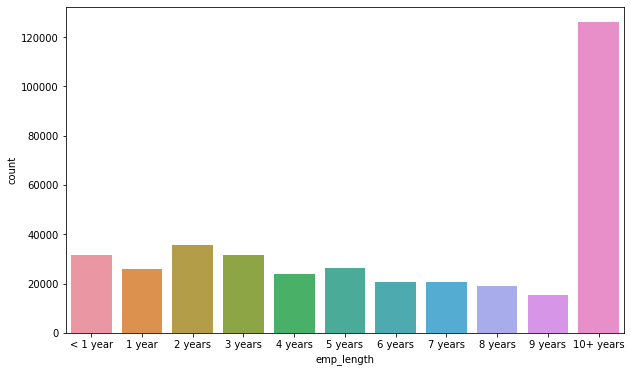

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

#### TASK : Plot out the countplot with a hue separating Fully Paid v/s Charged Off

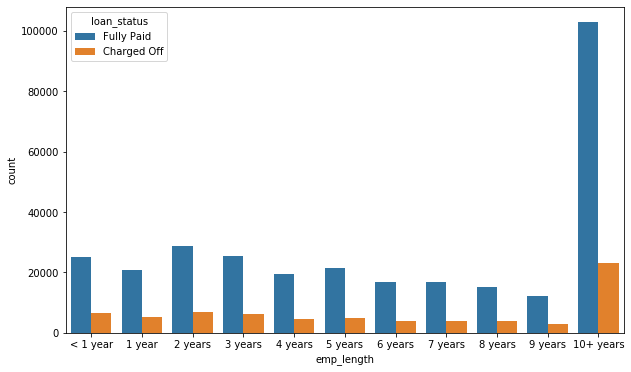

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

#### TASK : This is still doesn't really inform us if there is a strong relationship between employment length & being charged off, what we want is the % of charged offs per category. Essentially informing us what % of people per emp category didn't pay back their loan. 

In [41]:
emp_co = df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']

In [42]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

In [43]:
emp_co/emp_fp # Ratio

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [44]:
emp_len = emp_co/(emp_co+emp_fp) # %
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

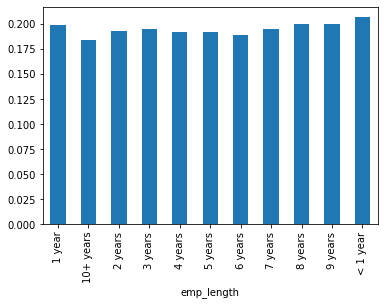

In [45]:
emp_len.plot(kind='bar')

#### TASK : Charge off rates are extremely similar accross all employment lengths. Go ahead & drop the emp_len column

In [46]:
df=df.drop('emp_length',axis=1)

#### TASK : Revisit the DataFrame to see what feature columns till have missing data

In [47]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### TASK : Review the title column v/s the purpose column. Is this repeated info?

In [48]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [49]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [50]:
feat_info('title')

The loan title provided by the borrower


#### TASK : The title colum is simply a string subcategory/description of the purpose column. Now drop title column

In [51]:
df = df.drop('title',axis=1)

#### TASK : In this part we will be filling missing data based on the values of another col in DataFrame

In [52]:
# finding out what does mort_acc feature represent?

feat_info('mort_acc')

Number of mortgage accounts.


In [53]:
# Creating a value count of that

df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

#### Now we will be finding with which other feaures correlates highly with morc_acc & see if we can use that to fill NAN

###### There are many ways we can deal with the missing data. We could attempt to build a simple model fill it in, such a linear model, we could just fill it in based on the mean of the columns, or we cound even bin the columns into categories & then set NaN as it own category. There is no 100% correct approch to it. Let's review the column to see which is most highly correlated to mort_acc

In [54]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

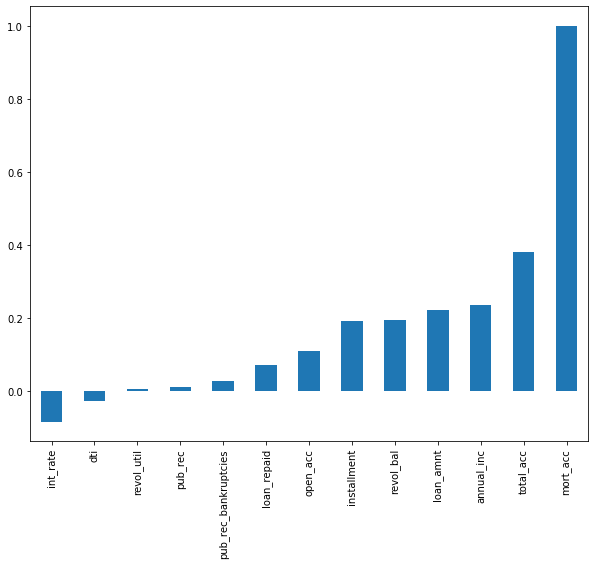

In [55]:
plt.figure(figsize=(10,8))
df.corr()['mort_acc'].sort_values().plot(kind='bar')

#### TASK : Looks like total_acc feature correlates with the mort_acc, this make sense! Let's try this fillna() approch. We will group the dataframe by the total_acc & cal the mean value for the mort_acc per total_acc entry. 

In [56]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [57]:
# filling missing value with mean()

def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else :
        return mort_acc

In [58]:
df['mort_acc']= df.apply(lambda x : fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [59]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [60]:
df = df.dropna()

In [61]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Section3 : Categorical Variables & Dummy Variable
#### SECTION 3 GOAL : We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.

## -------------------------------------------------------------------------------------------------------------------------

#### TASK : List all the columns that are currently non-numeric  

In [62]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### Now let's go throught all the string features to see what we should do with them

### (i) Feature : term

#### TASK : Convert the term feature into either a 36 or 60 integer num data type using .apply() or .map()

In [63]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [64]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [65]:
# Converting strings into numeric i.e 36 months : 36  &  60 months : 60

df ['term'] = df['term'].apply(lambda term : int(term[:3]))

In [66]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### (ii) Feature : grade

#### TASK : we know grade is a part of sub_grade so we drop the grade 

In [67]:
df = df.drop('grade',axis=1)

##### convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column & to add drop_first = True to your get_dummies call.

In [68]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [69]:
sub_grade_drop = df.drop('sub_grade',axis=1)

In [70]:
df = pd.concat([sub_grade_drop,dummies],axis=1)

In [71]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

### (iii) Feature : verification_status
### (iv)  Feature : application_type
### (v)   Feature : initial_list_status
### (vi)  Feature : purpose

#### TASK : conver these columns into dummy variables & concatenate them with the original DataFrame. Remember to set drop_first = True & to drop the original columns. 

In [72]:
dummies1 = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies1 ],axis=1)

### Feature : home_ownership

#### TASK : Review the value count for home ownership column

In [73]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [74]:
# Now if we look at the values NONE & ANY have vert low value so we can just merge it with OTHER

df['home_ownership'] = df['home_ownership'].replace(['None','ANY'],'OTHER')

In [75]:
dummies2 = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies2 ],axis=1)

### Feature : address

#### TASK : Create a column zip_code & extract the zip code from the address column

In [76]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [77]:
df['zip_code'] = df['address'].apply(lambda address : address[-5:])

In [78]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

In [79]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [80]:
dummies3 = pd.get_dummies(df['zip_code'],drop_first=True)

df = pd.concat([df.drop(['zip_code','address'],axis=1),dummies3 ],axis=1)

In [81]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'NONE', 'OTHER', 'OWN'

### Feature : issue_d

#### TASK : This would be data leakage, we wouldn't know beforehand whether or not a loan would be issused when using our model, so in theory we wouldn't have an issue_update, drop this feature

In [82]:
feat_info('issue_d')

The month which the loan was funded


In [83]:
df = df.drop('issue_d',axis=1)

### Feature : earlier_cr_line

#### TASK : This appears to be a historical time stamp feature. Extract the year from this feature using a apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'. Then drop the earliest_cr_line feature.

In [84]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [85]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date : int(date[-4:]))

## Section 4 : Train Test Split

## -------------------------------------------------------------------------------------------------------------------------

#### TASK : import train_test_split from sklearn

In [86]:
from sklearn.model_selection import train_test_split

#### TASK : drop load_status column we created earlier, since it's a duplicate of the loan_repaid column. We'll use the loan_repaid column since it's allready 0 & 1

In [87]:
df = df.drop('loan_status',axis=1)

#### TASK : Set X & y variable to the value of the feature & label

In [88]:
df['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 395219, dtype: int64

In [89]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

#### TASK : Perform a train/test split with test_size=0.2 & a random_state of 101

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

### Section 5 : Normalizing the Data

## -------------------------------------------------------------------------------------------------------------------------

#### TASK : Use a MinMaxScaler to normalize the feature data X_train & X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [92]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Section 5 : Creating a Model

## -------------------------------------------------------------------------------------------------------------------------

#### TASK : Import all the important library

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#### TASK : Bild a model to train our data

In [94]:
model1 = Sequential()


# 1st dense should match to the number of columns but not compulsory
model1.add(Dense(78,activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(39,activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(19,activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(units=1,activation='sigmoid'))


# Compile the model
model1.compile(loss='binary_crossentropy',optimizer='adam')

#### TASK : Fit the model to train data for at least 25 epochs

In [95]:
# validation_data : helps us to see if we are overfitting any where
model1.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2970 - val_loss: 0.2646
Epoch 2/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.2653 - val_loss: 0.2628
Epoch 3/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2629 - val_loss: 0.2627
Epoch 4/25
316175/316175 [==============================] - 5s 14us/sample - loss: 0.2617 - val_loss: 0.2622
Epoch 5/25
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2610 - val_loss: 0.2625
Epoch 6/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2602 - val_loss: 0.2616
Epoch 7/25
316175/316175 [==============================] - 5s 14us/sample - loss: 0.2601 - val_loss: 0.2618
Epoch 8/25
316175/316175 [==============================] - 5s 14us/sample - loss: 0.2596 - val_loss: 0.2623
Epoch 9/25
316175/316175 [==============================] - 5s 15us/sample - 

#### TASK : Save the model (optional)

In [96]:
from tensorflow.keras.models import load_model
model1.save('ANNS_BIG_PROJ_MODEL.h5')

### Section 6 : Evaluating Model Performance

## -------------------------------------------------------------------------------------------------------------------------

#### TASK : Plot out the validation loss versus the training loss 

In [97]:
losses = pd.DataFrame(model1.history.history)

In [98]:
losses

# loss = training loss
# val_loss = loss in our test set

,loss,val_loss
0,0.296955,0.264644
1,0.265256,0.262807
2,0.262907,0.262696
3,0.261685,0.262218
4,0.260965,0.262485
5,0.260175,0.261641
6,0.260080,0.261810
7,0.259596,0.262299
8,0.259331,0.261176
9,0.258954,0.262490


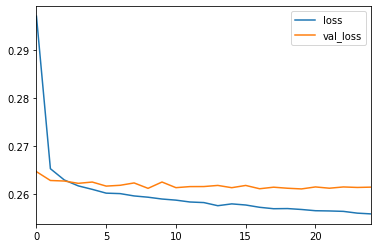

In [99]:
losses.plot()

In [100]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model1.predict_classes(X_test)

In [101]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [102]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

#### TASK : Given the customer below, would you offer this person a loan?

In [107]:
import random
random.seed(101)
random_index = random.randint(0,len(df))

new_cust = df.drop('loan_repaid',axis=1).iloc[random_index]
new_cust

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 79, dtype: float64

In [130]:
new_cust = scaler.transform(new_cust.reshape(1,79))
new_cust

array([[-2.56416831e-02, -1.56503183e+00, -2.15604031e-01,
        -1.31333693e-02,  1.07311918e-23,  3.01220470e-15,
        -2.85881460e+01, -1.35130074e-02,  0.00000000e+00,
         3.00778185e-21,  1.03323171e-10, -1.35134202e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+0

In [131]:
model1.predict_classes(new_cust)

array([[1]])

In [132]:
df.iloc[random_index]

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 80, dtype: float64

In [133]:
df.iloc[random_index]['loan_repaid'] #yes it was repaid

1.0

#### TASK : Minimizing the loss (Unnecessary)

In [103]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [104]:
# model1.fit(x=X_train,y=y_train,epochs=60,validation_data=(X_test,y_test),callbacks=[early_stopping])

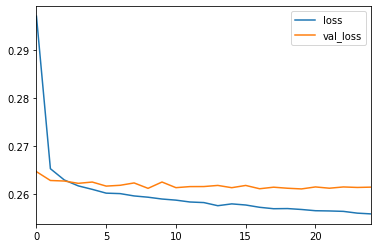

In [105]:
model_loss = pd.DataFrame(model1.history.history)
model_loss.plot()